In [2]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing, TrackConverter, GeneralizationType, TrackSimilarity, DouglasPeuckerGeneralizer, MinDistanceGeneralizer, MaxDistanceGeneralizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))
preprocessing = Preprocessing()
track_converter = TrackConverter()

Initializing pre-processing class
Initializing TrackConverter class


In [4]:
bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting tracks inside the bbox


In [5]:
track_df

,id,time,geometry,Calculated MAF.value,Calculated MAF.unit,Throttle Position.value,Throttle Position.unit,CO2.value,CO2.unit,Rpm.value,...,MAF.value,MAF.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,O2 Lambda Current ER.value,O2 Lambda Current ER.unit,O2 Lambda Current.value,O2 Lambda Current.unit
0,5eeb4acdd6e3cf256ba12a6a,2020-06-18T10:34:15,POINT (7.58872 51.96533),3.982765,g/s,13.040000,%,3.076674,kg/h,1072.152589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5eeb4acdd6e3cf256ba12a6c,2020-06-18T10:34:20,POINT (7.58915 51.96539),9.706970,g/s,18.239185,%,7.498604,kg/h,1168.581717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5eeb4acdd6e3cf256ba12a6d,2020-06-18T10:34:25,POINT (7.58884 51.96578),27.474901,g/s,60.483709,%,21.224277,kg/h,1946.997597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5eeb4acdd6e3cf256ba12a6e,2020-06-18T10:34:30,POINT (7.58869 51.96641),16.449089,g/s,16.448468,%,12.706871,kg/h,1879.381471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5eeb4acdd6e3cf256ba12a6f,2020-06-18T10:34:35,POINT (7.58866 51.96713),15.646914,g/s,20.000000,%,12.087193,kg/h,2060.186762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,575bca49e4b0a69192a28c69,2016-06-11T07:27:50,POINT (7.63665 51.95305),3.280673,g/s,13.000000,%,2.534310,kg/h,745.045276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,575bca49e4b0a69192a28c6a,2016-06-11T07:27:55,POINT (7.63658 51.95307),3.314591,g/s,13.000000,%,2.560511,kg/h,752.747865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,575bca49e4b0a69192a28c6b,2016-06-11T07:28:00,POINT (7.63657 51.95308),3.382068,g/s,13.000000,%,2.612637,kg/h,754.654504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,575bca49e4b0a69192a28c6c,2016-06-11T07:28:05,POINT (7.63657 51.95308),16.314034,g/s,18.645687,%,12.602541,kg/h,1637.681665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
track_df[track_df['track.id'] == track_df['track.id'].any()]

,id,time,geometry,Calculated MAF.value,Calculated MAF.unit,Throttle Position.value,Throttle Position.unit,CO2.value,CO2.unit,Rpm.value,...,MAF.value,MAF.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,O2 Lambda Current ER.value,O2 Lambda Current ER.unit,O2 Lambda Current.value,O2 Lambda Current.unit
0,5eeb4acdd6e3cf256ba12a6a,2020-06-18T10:34:15,POINT (7.58872 51.96533),3.982765,g/s,13.040000,%,3.076674,kg/h,1072.152589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5eeb4acdd6e3cf256ba12a6c,2020-06-18T10:34:20,POINT (7.58915 51.96539),9.706970,g/s,18.239185,%,7.498604,kg/h,1168.581717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5eeb4acdd6e3cf256ba12a6d,2020-06-18T10:34:25,POINT (7.58884 51.96578),27.474901,g/s,60.483709,%,21.224277,kg/h,1946.997597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5eeb4acdd6e3cf256ba12a6e,2020-06-18T10:34:30,POINT (7.58869 51.96641),16.449089,g/s,16.448468,%,12.706871,kg/h,1879.381471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5eeb4acdd6e3cf256ba12a6f,2020-06-18T10:34:35,POINT (7.58866 51.96713),15.646914,g/s,20.000000,%,12.087193,kg/h,2060.186762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5eeb4acdd6e3cf256ba12a70,2020-06-18T10:34:40,POINT (7.58863 51.96787),5.595397,g/s,14.000000,%,4.322427,kg/h,1929.579520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5eeb4acdd6e3cf256ba12a71,2020-06-18T10:34:45,POINT (7.58859 51.96853),6.748268,g/s,15.000000,%,5.213016,kg/h,1790.114259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5eeb4acdd6e3cf256ba12a72,2020-06-18T10:34:50,POINT (7.58855 51.96916),4.600883,g/s,14.000000,%,3.554168,kg/h,1592.107282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5eeb4acdd6e3cf256ba12a73,2020-06-18T10:34:55,POINT (7.58844 51.96970),5.876408,g/s,14.000000,%,4.539507,kg/h,1452.496307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5eeb4acdd6e3cf256ba12a74,2020-06-18T10:35:01,POINT (7.58826 51.97017),3.894918,g/s,13.000000,%,3.008812,kg/h,818.000012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# use just one track
# 'track' is appended to non-sensor related column names while pulling the data using track_api client
single_track_id = track_df['track.id'].unique()[1]
single_track = track_df[track_df['track.id'] == single_track_id]

In [8]:
single_track_id

'5de9d7a03bdb691868e76540'

In [9]:
single_track

,id,time,geometry,Calculated MAF.value,Calculated MAF.unit,Throttle Position.value,Throttle Position.unit,CO2.value,CO2.unit,Rpm.value,...,MAF.value,MAF.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,O2 Lambda Current ER.value,O2 Lambda Current ER.unit,O2 Lambda Current.value,O2 Lambda Current.unit
0,5de9d7a03bdb691868e76542,2019-11-29T12:24:48,POINT (7.60302 51.93549),3.527790,g/s,13.000000,%,2.725207,kg/h,763.163669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5de9d7a03bdb691868e76544,2019-11-29T12:24:53,POINT (7.60279 51.93574),7.134063,g/s,15.000000,%,5.511042,kg/h,1701.677369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5de9d7a03bdb691868e76545,2019-11-29T12:24:58,POINT (7.60318 51.93579),7.130710,g/s,16.000000,%,5.508452,kg/h,1361.423041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5de9d7a03bdb691868e76546,2019-11-29T12:25:03,POINT (7.60354 51.93574),26.263393,g/s,30.999999,%,20.288390,kg/h,1951.543919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5de9d7a03bdb691868e76547,2019-11-29T12:25:08,POINT (7.60403 51.93611),3.472391,g/s,13.000000,%,2.682411,kg/h,792.443191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,5de9d7a03bdb691868e765c8,2019-11-29T12:36:05,POINT (7.58749 51.96556),3.331351,g/s,13.000000,%,2.573459,kg/h,757.169811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,5de9d7a03bdb691868e765c9,2019-11-29T12:36:10,POINT (7.58695 51.96555),3.434403,g/s,13.000000,%,2.653065,kg/h,754.329693,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,5de9d7a03bdb691868e765ca,2019-11-29T12:36:15,POINT (7.58688 51.96547),3.256539,g/s,13.000000,%,2.515667,kg/h,761.104972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,5de9d7a03bdb691868e765cb,2019-11-29T12:36:21,POINT (7.58688 51.96544),3.202641,g/s,13.000000,%,2.474030,kg/h,748.507959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


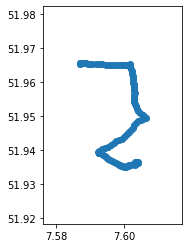

In [19]:
single_track.plot()

In [20]:
mpdTrack.df['CO2.value'].sum()

910.6903160793698

In [12]:
# convert the tracks to moving pandas trajectory collection
import movingpandas as mpd
trajCollection = preprocessing.trajectoryCollection(track_df, 100)
trajCollection

Finished creating 50 trajectories


In [13]:
# get our single track from the collection
mpdTrack = trajCollection.get_trajectory(single_track_id)
str(mpdTrack)

'Trajectory 5de9d7a03bdb691868e76540 (2019-11-29 12:24:48 to 2019-11-29 12:36:26) | Size: 138 | Length: 5599.9m\nBounds: (7.586873513467167, 51.93497064459818, 7.606243337376825, 51.96555515316689)\nLINESTRING (7.603024148757198 51.93548608427817, 7.602793289474294 51.93574292981515, 7.603176724093'

In [14]:
single_track['CO2.value'].isna().any()

False

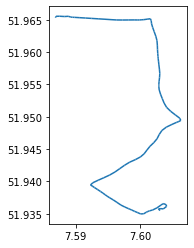

In [15]:
mpdTrack.plot()

In [21]:
mpdTrack.df['Speed.value'].sum()

4036.5750941690058

In [17]:
generalizedTrack = DouglasPeuckerGeneralizer(mpdTrack).generalize(0.001, ['CO2.value', 'Speed.value'])
# generalizedTrack

In [22]:
generalizedTrack.df['Speed.value'].sum()

4036.5750941690058

In [41]:
# generalize using douglas-peucker algorithm
# generalizedTracks = preprocessing.generalize(trajCollection, 0.001, 'douglas-peucker')
# str(generalizedTracks)

'TrajectoryCollection with 50 trajectories'

In [124]:
# get our single track trajectory from generalized trajectories
generalizedMpdTrack = generalizedTracks.get_trajectory(single_track_id)
str(generalizedMpdTrack)

'Trajectory 5de9d7a03bdb691868e76540 (2019-11-29 12:24:48 to 2019-11-29 12:36:26) | Size: 9 | Length: 5188.2m\nBounds: (7.586873513467167, 51.93548608427817, 7.606071745059019, 51.965332360706796)\nLINESTRING (7.603024148757198 51.93548608427817, 7.603189109407566 51.93634398175759, 7.598117393829'

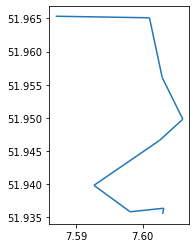

In [125]:
generalizedMpdTrack.plot()

In [127]:
generalizedMpdTrack.df['Speed.value'].sum()

21452.898136774078

In [128]:
generalizedMpdTrack.df['CO2.value'].sum()

4620.973010705069

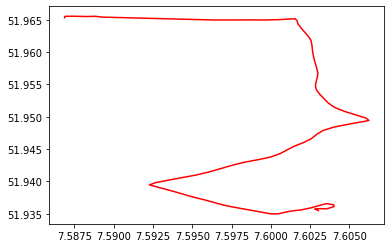

In [44]:
# Simple visualization of the raw trajectory
fig, ax = plt.subplots()
single_track_new = single_track
single_track_new['lat'] = single_track['geometry'].apply(lambda coord: coord.y)
single_track_new['lng'] = single_track['geometry'].apply(lambda coord: coord.x)
ax.plot(single_track_new['lng'], single_track_new['lat'], 'r-')
plt.show()

Amount of points before interpolation (128, 64)
Amount of points after interpolation (698, 64)


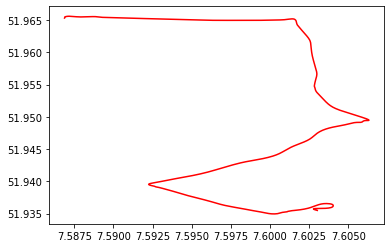

In [45]:
no_outliers = preprocessing.remove_outliers(single_track, 'CO2.value')

# interpolating for each second
interpolated_points = preprocessing.interpolate(no_outliers)

# Simple visualization of the trajectory after interpolation
fig, ax = plt.subplots()
ax.plot(interpolated_points['lng'], interpolated_points['lat'], 'r-')
plt.show()

In [46]:
interpolated_points

,lng,lat,Calculated MAF.value,Throttle Position.value,CO2.value,Rpm.value,Speed.value,Consumption (GPS-based).value,Consumption.value,Engine Load.value,...,sensor.model,sensor.type,track.appVersion,track.begin,track.end,track.id,track.length,track.touVersion,id,geometry
0,7.603024,51.935486,3.527790,13.000000,2.725207,763.163669,31.116072,NaN,1.159663,31.764706,...,A 170,car,nan,2019-11-29T12:24:48Z,2019-11-29T12:36:26Z,5de9d7a03bdb691868e76540,5.609821306809593,nan,YEVNTWJS97F1IZOWA1JI1JLB,POINT (7.60302 51.93549)
1,7.602878,51.935588,4.250079,13.400574,3.283173,951.135725,29.764708,NaN,1.397095,31.124974,...,A 170,car,nan,2019-11-29T12:24:48Z,2019-11-29T12:36:26Z,5de9d7a03bdb691868e76540,5.609821306809593,nan,QVE4Y68LMRTSKQOM9IQQ7TZC,POINT (7.60288 51.93559)
2,7.602799,51.935663,4.972369,13.801148,3.841140,1139.107737,28.413344,NaN,1.634527,30.485242,...,A 170,car,nan,2019-11-29T12:24:48Z,2019-11-29T12:36:26Z,5de9d7a03bdb691868e76540,5.609821306809593,nan,FG3YAHMATD2MB3LD6QEU81BH,POINT (7.60280 51.93566)
3,7.602778,51.935717,5.694658,14.201722,4.399106,1327.079793,27.061979,NaN,1.871960,29.845511,...,A 170,car,nan,2019-11-29T12:24:48Z,2019-11-29T12:36:26Z,5de9d7a03bdb691868e76540,5.609821306809593,nan,WHM954AADLN1APJZ2KO24OOI,POINT (7.60278 51.93572)
4,7.602806,51.935752,6.416948,14.602296,4.957072,1515.051850,25.710615,NaN,2.109392,29.205779,...,A 170,car,nan,2019-11-29T12:24:48Z,2019-11-29T12:36:26Z,5de9d7a03bdb691868e76540,5.609821306809593,nan,8ZV2I8HQKA0LSHZ2T4GMJLI3,POINT (7.60281 51.93575)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,7.587074,51.965599,3.215390,13.000000,2.483879,751.487819,7.200163,NaN,1.056970,29.841912,...,A 170,car,nan,2019-11-29T12:24:48Z,2019-11-29T12:36:26Z,5de9d7a03bdb691868e76540,5.609821306809593,nan,0V0CEIKDJ47KSDPN344VT0NV,POINT (7.58707 51.96560)
694,7.586982,51.965568,3.228232,13.000000,2.493800,754.489180,8.387030,NaN,1.061191,29.880177,...,A 170,car,nan,2019-11-29T12:24:48Z,2019-11-29T12:36:26Z,5de9d7a03bdb691868e76540,5.609821306809593,nan,36SEVHLXTV3HBLG2SB0F01VJ,POINT (7.58698 51.96557)
695,7.586895,51.965510,3.241074,13.000000,2.503720,757.490541,9.573897,NaN,1.065413,29.918443,...,A 170,car,nan,2019-11-29T12:24:48Z,2019-11-29T12:36:26Z,5de9d7a03bdb691868e76540,5.609821306809593,nan,OB4N0IE3C6PEO7J5NUT32UXY,POINT (7.58690 51.96551)
696,7.586890,51.965425,3.253916,13.000000,2.513640,760.491901,10.760764,NaN,1.069634,29.956708,...,A 170,car,nan,2019-11-29T12:24:48Z,2019-11-29T12:36:26Z,5de9d7a03bdb691868e76540,5.609821306809593,nan,RM0E8FVWPWX5NW7RTAIRLKBQ,POINT (7.58689 51.96542)


In [47]:
import plotly.express as px

# Visualizing points by the CO2 Value
fig = px.scatter_mapbox(single_track_new, lat="lat", lon="lng", color="CO2.value", title="CO2 values along the track, before cleaning and interpolation", zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [48]:
# Visualizing points by the CO2 Value
fig = px.scatter_mapbox(interpolated_points, lat="lat", lon="lng", color="CO2.value", title="CO2 values along the track, cleaned and interpolated", zoom=11)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

AGGERATION WORK BELOW!

In [63]:
bbox = BboxSelector([
    7.564130554199218, # min_x
    51.95590322041212, # min_y
    7.570351104736328, # max_x
    51.97874790276371  # max_y
])

# issue a query
bbox_df = track_api.get_tracks(bbox=bbox, num_results=10) # requesting tracks inside the bbox

#conversion to moving pandas geodataframe format
bbox_mpd_df = track_converter.to_movingpandas(bbox_df)

# Aggregate Function
aggregatedflows = preprocessing.aggregate(bbox_mpd_df, 100, 5, 1000, 100, 5)

# Input Parameters!
# 01 - Moving Pandas GeoDataFrame, 
# 02 - Minimum Length of a Trajectory (to be considered as a Trajectory)
# 03 - Minimum Gap (in minutes) for splitting single Trajectory into more 
# 04 - Maximum distance between significant points 
# 05 - Minimum distance between significant points 
# 06 - Minimum duration (in minutes) required for stop detection

Finished creating 10 trajectories
Extracted 10 individual trips from 10 continuous vehicle tracks
Extracting significant points ...
  No. significant points: 456
Clustering significant points ...
  No. clusters: 69
Computing flows ...
Flows ready!


In [64]:
aggregatedflows

,geometry,weight
0,"LINESTRING (7.59889 51.96560, 7.58899 51.96490)",6
1,"LINESTRING (7.58899 51.96490, 7.58360 51.96085)",7
2,"LINESTRING (7.58360 51.96085, 7.57653 51.95924)",7
3,"LINESTRING (7.57653 51.95924, 7.57013 51.95716)",7
4,"LINESTRING (7.57013 51.95716, 7.56407 51.95430)",5
...,...,...
77,"LINESTRING (7.59889 51.96560, 7.61305 51.96805)",1
78,"LINESTRING (7.61305 51.96805, 7.61773 51.96306)",1
79,"LINESTRING (7.61773 51.96306, 7.61986 51.95596)",1
80,"LINESTRING (7.61986 51.95596, 7.63579 51.95216)",1


In [65]:
import folium 
m = folium.Map(location=[51.96560, 7.59889 ], zoom_start=12, tiles='cartodbpositron')

index = 0
for row in range(0,len(aggregatedflows)):
    my_poylyline = []
    mylng = aggregatedflows.loc[index,'geometry'].coords[0][0]
    mylat = aggregatedflows.loc[index,'geometry'].coords[0][1]
    my_poylyline.append( [ mylat , mylng ] )

    mylng = aggregatedflows.loc[index,'geometry'].coords[1][0]
    mylat = aggregatedflows.loc[index,'geometry'].coords[1][1]
    my_poylyline.append([mylat,mylng])
    
    myweight = int(aggregatedflows.loc[index,'weight'])
    my_line = folium.PolyLine(locations = my_poylyline, weight= myweight )
    m.add_child(my_line)
    
    index +=1 

m

ESTIMATE THE AVERAGE FLOW BETWEEN REGIONS!

In [66]:
from shapely.geometry import Point, LineString, Polygon
import movingpandas as mpd
from statistics import mean
import datetime 

bbox = BboxSelector([
    7.504130554199218, # min_x
    51.90590322041212, # min_y
    7.600351104736328, # max_x
    51.99874790276371  # max_y
])
    
# issue a query
bbox_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting tracks inside the bbox

#conversion to moving pandas geodataframe format
bbox_mpd_df = track_converter.to_movingpandas(bbox_df)

In [67]:
# regions of interest
from_region = Polygon([(7.59, 51.955), (7.59, 51.97), (7.64, 51.97), (7.64, 51.955)])
to_region = Polygon([(7.61, 51.93), (7.61, 51.948), (7.66, 51.948), (7.66, 51.93)])

In [68]:
# function call to get trajectories running between regions
twoway = 1
between_region_trajectories = preprocessing.flow_between_regions(bbox_mpd_df, from_region, to_region, twoway)

Found 22 trajectories moving between provided regions with following details:
Average Distance: 8.68 kms
Maximum Distance: 9.52 kms
Average Duration: 0:18:01 
Maximum Duration: 0:28:01 


In [69]:
# to convert list of trajectories into a trajectory collection object for Aggregation 
regiontrajectores_collection = mpd.TrajectoryCollection(between_region_trajectories, 'track.id')

# aggregating trajectories to have information about average flow
aggregated_trajectories = mpd.TrajectoryCollectionAggregator(regiontrajectores_collection, max_distance=1000, min_distance=1, min_stop_duration=datetime.timedelta(minutes=5))

# extracting in form of flows and as gdf
averageflows_gdf = aggregated_trajectories.get_flows_gdf()
averageflows_gdf

Extracting significant points ...
  No. significant points: 422
Clustering significant points ...
  No. clusters: 17
Computing flows ...
Flows ready!


,geometry,weight
0,"LINESTRING (7.65535 51.93639, 7.64662 51.94291)",9
1,"LINESTRING (7.64662 51.94291, 7.63220 51.93783)",10
2,"LINESTRING (7.63220 51.93783, 7.62441 51.93749)",10
3,"LINESTRING (7.62441 51.93749, 7.61793 51.93537)",11
4,"LINESTRING (7.61793 51.93537, 7.60948 51.93496)",11
5,"LINESTRING (7.60948 51.93496, 7.60240 51.93545)",11
6,"LINESTRING (7.60240 51.93545, 7.60948 51.93496)",15
7,"LINESTRING (7.60948 51.93496, 7.61107 51.94278)",6
8,"LINESTRING (7.61107 51.94278, 7.61668 51.94976)",7
9,"LINESTRING (7.61668 51.94976, 7.60473 51.95063)",7


In [70]:
import folium 
m = folium.Map(location=[51.92560, 7.63889 ], zoom_start=12, tiles='cartodbpositron')

################# PLOTTING REGIONS #################

from_poly_coords = []
to_poly_coords = []

# to extract coordiantes from "FIRST REGION" 
poly_index = 0 
for value in range(0,len(from_region.exterior.coords)):
    temp = []
    temp.append(from_region.exterior.coords[poly_index][1])
    temp.append(from_region.exterior.coords[poly_index][0])
    from_poly_coords.append(temp)
    poly_index +=1

# to extract coordiantes from "SECOND REGION" 
poly_index = 0 
for value in range(0,len(to_region.exterior.coords)):
    temp = []
    temp.append(to_region.exterior.coords[poly_index][1])
    temp.append(to_region.exterior.coords[poly_index][0])
    to_poly_coords.append(temp)
    poly_index +=1

# Plotting both the Regions
first_region = folium.Polygon(locations = from_poly_coords, color='orange')
m.add_child(first_region)
second_region = folium.Polygon(locations = to_poly_coords, color='green')
m.add_child(second_region)


################# PLOTTING TRAJECTORIES #################

departure_points = []
trajectory_row = 0

# to extract coordiantes from "TRAJECTORIES" 
for trajectory in range(0, len(regiontrajectores_collection.trajectories)):
    point_row = 0 
    for point in range(0, len(regiontrajectores_collection.trajectories[trajectory_row].df)):
        temp = []
        temp.append(regiontrajectores_collection.trajectories[trajectory_row].df['geometry'][point_row].y)
        temp.append(regiontrajectores_collection.trajectories[trajectory_row].df['geometry'][point_row].x)
        departure_points.append(temp)
        point_row += 1 
    trajectory_row += 1
    
# Plotting Trajectories 
index = 0   
for row in range(0,len(departure_points)):
    folium.Circle(radius=5, location = departure_points[index], color='crimson').add_to(m)
    index += 1 

################# PLOTTING AVERAGE FLOW #################

index = 0
# to extract coordiantes from "FLOWS" 
for row in range(0,len(averageflows_gdf)):
    my_poylyline = []
    mylng = averageflows_gdf.loc[index,'geometry'].coords[0][0]
    mylat = averageflows_gdf.loc[index,'geometry'].coords[0][1]
    my_poylyline.append( [ mylat , mylng ] )

    mylng = averageflows_gdf.loc[index,'geometry'].coords[1][0]
    mylat = averageflows_gdf.loc[index,'geometry'].coords[1][1]
    my_poylyline.append([mylat,mylng])
    
    myweight = int(averageflows_gdf.loc[index,'weight'])
    my_line = folium.PolyLine(locations = my_poylyline, weight=round((myweight/2)))
    m.add_child(my_line)
    
    index +=1 
    
m

CLUSTERING WORK BELOW!

In [71]:
# TODO CLUSTERING

# convert to a moving pandas format using Sebastian's converter
# if using moving pandas format
single_track_mp = track_converter.to_movingpandas(single_track)
# call the clustering function from the preprocessing
clustered_track = preprocessing.cluster(single_track_mp)
clustered_track

# visualize the result

'Clustering function was called. Substitute this string with clustering result'

## Aggregation of data by regular grid
Aggregation of user-spcified field using square grid. Grid size should be in coordinate system of data frame

In [72]:
grid=preprocessing.aggregateByGrid(track_df,'CO2.value','mean',0.05)
grid

NotImplementedError: fillna currently only supports filling with a scalar geometry

### Plot aggregated data using choropleth map
Plot grid-wise aggregated data. Only the grids with non-zero values will be plotted.

In [73]:
preprocessing.plotAggregate(grid,'CO2.value')

NameError: name 'grid' is not defined

## Clustering trajectories based on origin

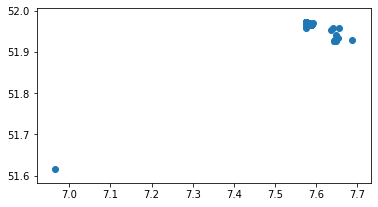

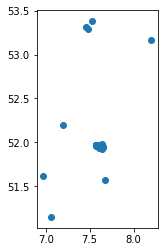

In [74]:
#Construct geodataframe for origin and destination of all tracks
track_list=list(track_df['track.id'].unique())
origin,destination=gpd.GeoDataFrame(),gpd.GeoDataFrame()
for track in track_list:
    selected_tracks=track_df[track_df['track.id']==track]
    current_origin=selected_tracks[selected_tracks['time']==selected_tracks['time'].min()]
    current_destination=selected_tracks[selected_tracks['time']==selected_tracks['time'].max()]
    origin=origin.append(current_origin)
    destination=destination.append(current_destination)
destination.plot()
origin.plot()

## Temporal Filters

In [75]:
#conversion to moving pandas geodataframe format
bbox_mpd_df = track_converter.to_movingpandas(bbox_df)

In [76]:
# Extracting Trajectories for provided DAY of the Week
filterday = 'Sunday'
filter_day_tracks = preprocessing.temporal_filter_weekday(bbox_mpd_df, filterday) 
len(filter_day_tracks.trajectories)

3

In [77]:
# Extracting Trajectories for provided HOURS of the day
start_hour = 8
end_hour = 9
filter_hours_tracks = preprocessing.temporal_filter_hours(bbox_mpd_df, start_hour, end_hour) 
len(filter_hours_tracks.trajectories)

6

In [78]:
# Extracting Trajectories for provided hours DATE
filterdate = '2020-05-09'
filter_date_tracks = preprocessing.temporal_filter_date(bbox_mpd_df, filterdate) 
len(filter_date_tracks.trajectories)

2

In [84]:
sim = TrackSimilarity()
sim.similarity('pcm',trajectory,trajectory)

Initializing TrackSimilarity class


AttributeError: 'int' object has no attribute 'id'